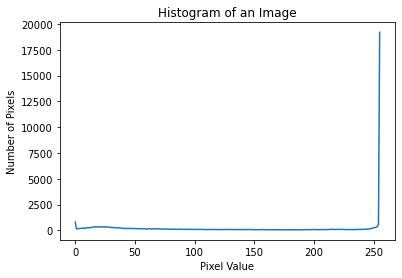

In [28]:
import cv2 as cv

# importing library for plotting 
from matplotlib import pyplot as plt 
  
# reads an input image 
img = cv.imread('Butterfly.jpg') # 0 is used to make it as Gray scale
  
# find frequency of pixels in range 0-255 
histr = cv.calcHist([img],[1],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of an Image')
plt.show() 

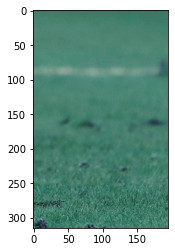

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

original_image = cv2.imread("goalkeeper.jpg")
hsv_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)

roi = cv2.imread("pitch_ground.jpg")

# Histogram ROI

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

#Here First Two Channels are taken - H and S. So 180 and 256 is used - [180,256]

roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

mask = cv2.calcBackProject([hsv_original], [0, 1], roi_hist, [0, 180, 0, 256], 1)

# Filtering remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.filter2D(mask, -1, kernel)
_, mask = cv2.threshold(mask, 100, 255, cv2.THRESH_BINARY)

mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(original_image, mask)


while True:
    cv.imshow("Footballer", original_image)
    cv.imshow("Region of Interest", roi)
    cv.imshow("Masked Image",mask)
    cv2.imshow("Result", result)
    cv2.imshow("Kernel", kernel)
    
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

cv.destroyAllWindows()

plt.imshow(original_image)
plt.imshow(roi)
plt.show()

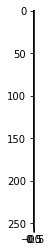

In [27]:
plt.imshow(histr)
plt.show()

In [25]:
img.shape

(191, 263, 3)

In [26]:
while True:
    cv.imshow("Butterfly Image", img)
    
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

cv.destroyAllWindows()


In [18]:
img = cv.imread('Butterfly.jpg')

hsv_original = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hsv_original.shape

hue, saturation, value = cv.split(hsv_original)

for s in saturation:
    print(s)

[  9   4   6  14  20  23  27  37 211  89 110 125  64  41  32  29  13   9
   1   1   1   2   0   2   1   1   2   1   1   2   2   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

# BackProjection:
If we want to detect a particular object or a region pixel values of that location would be an important feature. As it would be different than a different object. For example pixel values would be different for a dog and car.

Histogram of a certain area can be seen as a function that gives the probability that a particular pixel belongs to a certain object. By normalizing the image histogram obtained we can get the probability of a given intensity value belongs to our region of interest.


After getting the histogram we can backproject it onto any image where we want to test if the object exists.


In case of backprojection we replace each pixel value of the input image with the corresponding probability value of the normalized histogram that we computed for our object of interest. The intensity values of the locations which is similar to the region of interest have higher probability values than the regions which are not similar.


In short we can say backprojection represents the probability that our test image contains the object of the reference image.